In [10]:
import spacy
import en_core_web_sm

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [11]:
nlp = en_core_web_sm.load()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [138]:
doc = nlp('''
Some contemporaries alleged that Bonaparte was put under house arrest at Nice for his association with the Robespierres following their fall in the Thermidorian Reaction in July 1794, but Napoleon's secretary Bourrienne disputed the allegation in his memoirs. According to Bourrienne, jealousy was responsible, between the Army of the Alps and the Army of Italy (with whom Napoleon was seconded at the time).[47] Bonaparte dispatched an impassioned defense in a letter to the commissar Saliceti, and he was subsequently acquitted of any wrongdoing.[48] He was released within two weeks and, due to his technical skills, was asked to draw up plans to attack Italian positions in the context of France's war with Austria. He also took part in an expedition to take back Corsica from the British, but the French were repulsed by the British Royal Navy.[49]

By 1795, Bonaparte had become engaged to Désirée Clary, daughter of François Clary. Désirée's sister Julie Clary had married Bonaparte's elder brother Joseph.[50] In April 1795, he was assigned to the Army of the West, which was engaged in the War in the Vendée—a civil war and royalist counter-revolution in Vendée, a region in west central France on the Atlantic Ocean. As an infantry command, it was a demotion from artillery general—for which the army already had a full quota—and he pleaded poor health to avoid the posting.[51]
Etching of a street, there are many pockets of smoke due to a group of republican artillery firing on royalists across the street at the entrance to a building
Journée du 13 Vendémiaire, artillery fire in front of the Church of Saint-Roch, Paris, Rue Saint-Honoré

He was moved to the Bureau of Topography of the Committee of Public Safety and sought unsuccessfully to be transferred to Constantinople in order to offer his services to the Sultan.[52] During this period, he wrote the romantic novella Clisson et Eugénie, about a soldier and his lover, in a clear parallel to Bonaparte's own relationship with Désirée.[53] On 15 September, Bonaparte was removed from the list of generals in regular service for his refusal to serve in the Vendée campaign. He faced a difficult financial situation and reduced career prospects.[54]

On 3 October, royalists in Paris declared a rebellion against the National Convention.[55] Paul Barras, a leader of the Thermidorian Reaction, knew of Bonaparte's military exploits at Toulon and gave him command of the improvised forces in defence of the Convention in the Tuileries Palace. Napoleon had seen the massacre of the King's Swiss Guard there three years earlier and realised that artillery would be the key to its defence.[28] 
''')

In [139]:
locations = [X for X in doc.ents if X.label_ in ['GPE', 'LOC']]
locations

[,
 Nice,
 Alps,
 France,
 Austria,
 François Clary,
 West,
 France,
 the Atlantic Ocean,
 ,
 ,
 Vendémiaire,
 Paris,
 Paris,
 Toulon,
 ]

In [140]:
import geocoder

In [141]:
coordinates = { X.text: geocoder.osm(X.text) for X in locations }

In [142]:
latlngs = {}
for name,item in coordinates.items():
    if item.geojson['features']:
        latlngs[name] = Point(
            item.geojson['features'][0]['properties']['lng'],
            item.geojson['features'][0]['properties']['lat']
        )
latlngs

{'Nice': <shapely.geometry.point.Point at 0x15d264f6d68>,
 'Alps': <shapely.geometry.point.Point at 0x15d264f67f0>,
 'France': <shapely.geometry.point.Point at 0x15d264f6748>,
 'Austria': <shapely.geometry.point.Point at 0x15d264ab5f8>,
 'West': <shapely.geometry.point.Point at 0x15d264abb38>,
 'the Atlantic Ocean': <shapely.geometry.point.Point at 0x15d264ab6a0>,
 'Vendémiaire': <shapely.geometry.point.Point at 0x15d264abda0>,
 'Paris': <shapely.geometry.point.Point at 0x15d264ab240>,
 'Toulon': <shapely.geometry.point.Point at 0x15d264abef0>}

In [143]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [144]:
list(latlngs.values())

In [145]:
df = pd.DataFrame(list(latlngs.values()), index=list(latlngs.keys()), columns=['Coordinates'])
df

,Coordinates
Nice,POINT (7.2683912 43.7009358)
Alps,POINT (9.23790745975765 45.9531685)
France,POINT (1.8883335 46.603354)
Austria,POINT (13.199959 47.2000338)
West,POINT (34.5731341 0.5090396)
the Atlantic Ocean,POINT (-38.320312 13.581921)
Vendémiaire,POINT (3.0773133 50.4801385)
Paris,POINT (2.3514992 48.8566101)
Toulon,POINT (5.9304919 43.1257311)


In [146]:
import matplotlib.pyplot as plt

In [147]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [148]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

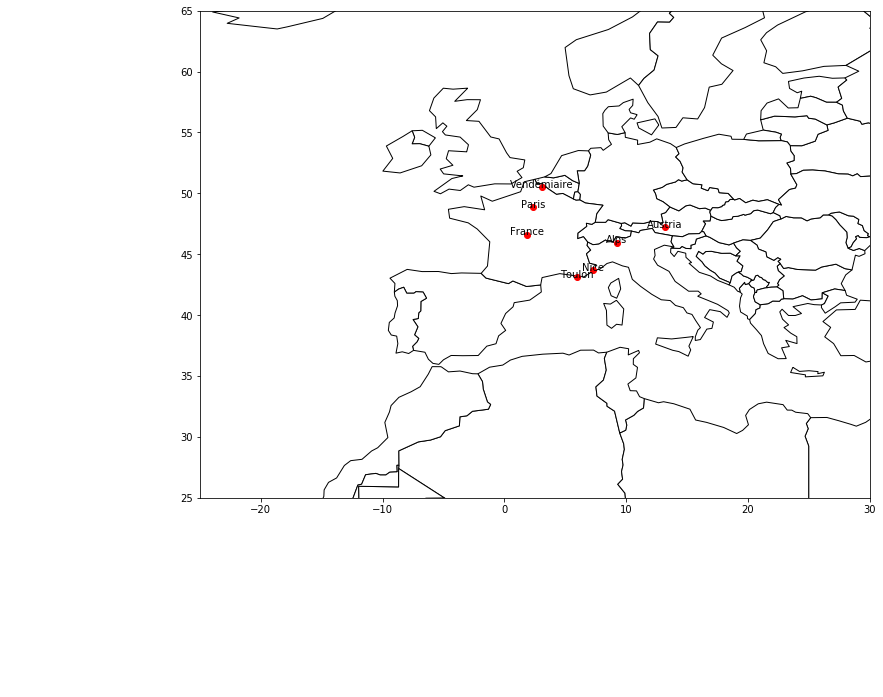

In [149]:
ax = world.plot(
    color='white', edgecolor='black', figsize=(12,12)
)

gdf.plot(ax=ax, color='red')
for idx,row in gdf.iterrows():
    text_coords = [arr.tolist()[0] for arr in row.Coordinates.xy]
    plt.annotate(s=idx, xy=text_coords, horizontalalignment='center', size="medium")

plt.xlim(-25, 30)
plt.ylim(25, 65)
plt.show()